In [1]:
import os
os.environ['DISABLE_V2_BEHAVIOR'] = '1'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import ktrain
from ktrain import text as txt

Instructions for updating:
non-resource variables are not supported in the long term
Using DISABLE_V2_BEHAVIOR with TensorFlow


In [4]:
# load data
(trn, val, preproc) = txt.entities_from_txt('data/custom/DATA_ANNOTATED.csv',
                                            sentence_column='Sentence',
                                            word_column='Word',
                                            tag_column='Tag', 
                                            data_format='gmb',
                                            use_char=True)

detected encoding: utf-8 (if wrong, set manually)
Number of sentences:  28834
Number of words in the dataset:  63950
Tags: ['B-LANGUAGE', 'O', 'B-ORG', 'I-EVENT', 'B-PRODUCT', 'B-LAW', 'I-TIME', 'I-CARDINAL', 'B-MONEY', 'I-MONEY', 'B-PER', 'I-ORG', 'I-WORK_OF_ART', 'I-DATE', 'I-NORP', 'B-QUANTITY', 'B-CARDINAL', 'I-QUANTITY', 'I-PER', 'B-PERCENT', 'B-TIME', 'B-LOC', 'I-PERCENT', 'I-PRODUCT', 'I-LAW', 'B-NORP', 'B-WORK_OF_ART', 'B-ORDINAL', 'I-LOC', 'B-DATE', 'B-EVENT']
Number of Labels:  31
Longest sentence: 74 words


In [5]:
model = txt.sequence_tagger('bilstm-crf', preproc)

Embedding schemes employed (combined with concatenation):
	word embeddings initialized randomly
	character embeddings



In [6]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
preparing training data ...done.
Epoch 1/2
810/810 [==============================] - 230s 278ms/step - batch: 404.5000 - size: 31.9975 - loss: 10.6721
Epoch 2/2
810/810 [==============================] - 229s 283ms/step - batch: 404.5000 - size: 31.9975 - loss: nan


done.
Visually inspect loss plot and select learning rate associated with falling loss


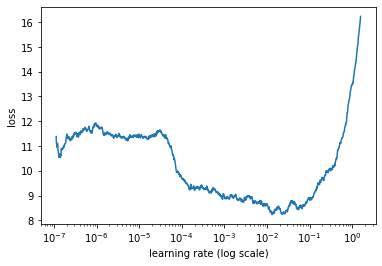

In [7]:
learner.lr_find(show_plot=True, max_epochs=2)

In [8]:
history = learner.fit(lr=1e-2, n_cycles=2, cycle_len=7) 

preparing validation data ...done.
Epoch 1/14
811/811 [==============================] - 241s 291ms/step - batch: 405.0000 - size: 31.9975 - loss: 8.4162 - val_loss: 8.2774
Epoch 2/14
811/811 [==============================] - 235s 290ms/step - batch: 405.0000 - size: 31.9975 - loss: 8.2468 - val_loss: 8.2723
Epoch 3/14
811/811 [==============================] - 237s 292ms/step - batch: 405.0000 - size: 31.9975 - loss: 8.2083 - val_loss: 8.2822
Epoch 4/14
811/811 [==============================] - 237s 292ms/step - batch: 405.0000 - size: 31.9975 - loss: 8.1857 - val_loss: 8.2815
Epoch 5/14
811/811 [==============================] - 235s 289ms/step - batch: 405.0000 - size: 31.9975 - loss: 8.1672 - val_loss: 8.2913
Epoch 6/14
811/811 [==============================] - 235s 290ms/step - batch: 405.0000 - size: 31.9975 - loss: 8.1559 - val_loss: 8.2944
Epoch 7/14
811/811 [==============================] - 237s 292ms/step - batch: 405.0000 - size: 31.9975 - loss: 8.1507 - val_loss: 8.2963

In [9]:
learner.validate(class_names=preproc.get_classes())

   F1:  68.78
              precision    recall  f1-score   support

    CARDINAL       0.71      0.79      0.75       576
        DATE       0.76      0.80      0.78       861
       EVENT       0.58      0.48      0.53       116
    LANGUAGE       1.00      0.50      0.67        12
         LAW       0.00      0.00      0.00         1
         LOC       0.76      0.79      0.78      1166
       MONEY       0.50      0.46      0.48        13
        NORP       0.79      0.69      0.73       151
     ORDINAL       0.85      0.98      0.91       140
         ORG       0.59      0.54      0.56       768
         PER       0.62      0.68      0.65      1530
     PERCENT       1.00      1.00      1.00         2
     PRODUCT       0.28      0.25      0.27        68
    QUANTITY       0.73      0.66      0.69        65
        TIME       0.72      0.73      0.72       304
 WORK_OF_ART       0.16      0.13      0.14       141

   micro avg       0.68      0.70      0.69      5914
   macro avg

0.6877865777407253

### Prevendo novas frases

In [10]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [11]:
predictor.predict('UPDATE from the ground- Photos just in from Marsh Harbour, where we set up a water station at a local primary school. Marsh Harbour experienced the full force of # Hurricane Dorian, & we use @katadyn reverse osmosis water treatment systems to  purify salt water into drinking water.')

[('UPDATE', 'O'),
 ('from', 'O'),
 ('the', 'O'),
 ('ground', 'O'),
 ('-', 'O'),
 ('Photos', 'O'),
 ('just', 'O'),
 ('in', 'O'),
 ('from', 'O'),
 ('Marsh', 'B-LOC'),
 ('Harbour', 'I-LOC'),
 (',', 'O'),
 ('where', 'O'),
 ('we', 'O'),
 ('set', 'O'),
 ('up', 'O'),
 ('a', 'O'),
 ('water', 'O'),
 ('station', 'O'),
 ('at', 'O'),
 ('a', 'O'),
 ('local', 'O'),
 ('primary', 'O'),
 ('school', 'O'),
 ('.', 'O'),
 ('Marsh', 'B-LOC'),
 ('Harbour', 'I-LOC'),
 ('experienced', 'O'),
 ('the', 'O'),
 ('full', 'O'),
 ('force', 'O'),
 ('of', 'O'),
 ('#', 'O'),
 ('Hurricane', 'B-EVENT'),
 ('Dorian', 'I-EVENT'),
 (',', 'O'),
 ('&', 'O'),
 ('we', 'O'),
 ('use', 'O'),
 ('@', 'O'),
 ('katadyn', 'O'),
 ('reverse', 'O'),
 ('osmosis', 'O'),
 ('water', 'O'),
 ('treatment', 'O'),
 ('systems', 'O'),
 ('to', 'O'),
 ('purify', 'O'),
 ('salt', 'O'),
 ('water', 'O'),
 ('into', 'O'),
 ('drinking', 'O'),
 ('water', 'O'),
 ('.', 'O')]